#Predicting Cardiovascular Disease with DNN

Given features of a patient here our aim is to predict that person has Cardiovascular Disease or not.

You can download the dataset from [here](https://drive.google.com/file/d/1OCQyzGq-qsbgH_8tBCGT-bZ-v5H5oOpJ/view?usp=sharing)

In this notebook we will cover all the concepts whic were theoritecally introduced in Intro to MLP notebook.


In [2]:
#import all the necessary modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model


In [3]:
# We are reading our data
df = pd.read_csv("cardio_train.csv", delimiter=';')
df.drop(columns='id',inplace=True)  #since it does not carry any information

In [4]:
# First 5 rows of our data
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


###Let's look at what each column represents in the above Dataframe:<br>

1. age - age in days<br>
2. gender - Male/female (1 - women, 2 - men)<br>
3. height - int (cm) <br>
4. weight - float (kg) <br>
5. ap_hi -Systolic blood pressure -  int <br>
6. ap_lo -Diastolic blood pressure -  int <br>
7. cholesterol - 1: normal, 2: above normal, 3: well above normal <br>
8. gluc - Glucose -  1: normal, 2: above normal, 3: well above normal <br>
9. smoke - Smoking<br> 
10. alco  - Alcohol intake <br>
11. active - Physical activity<br>
12. cardio  - Presence or absence of cardiovascular disease(Target parameter)
 

In [5]:
df.info()
# We can deduce no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


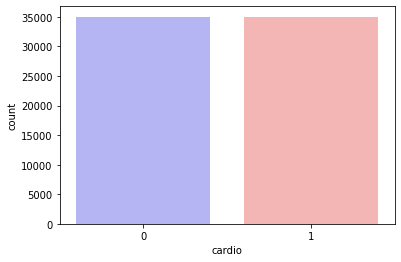

In [6]:
sns.countplot(x="cardio", data=df, palette="bwr")
plt.show()
#We can see that our Dataset is perfectly balanced i.e both Positive and negative case have equal data points

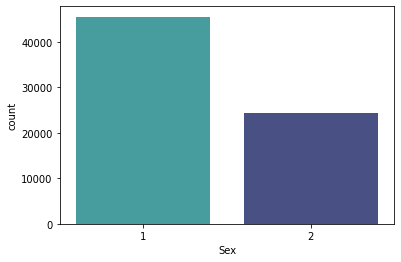

In [7]:

sns.countplot(x='gender', data=df, palette="mako_r")
plt.xlabel("Sex")
plt.show()
# We can see we have more woman than man datapoints

In [8]:
df.groupby('cardio').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,18881.623711,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,20056.813031,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


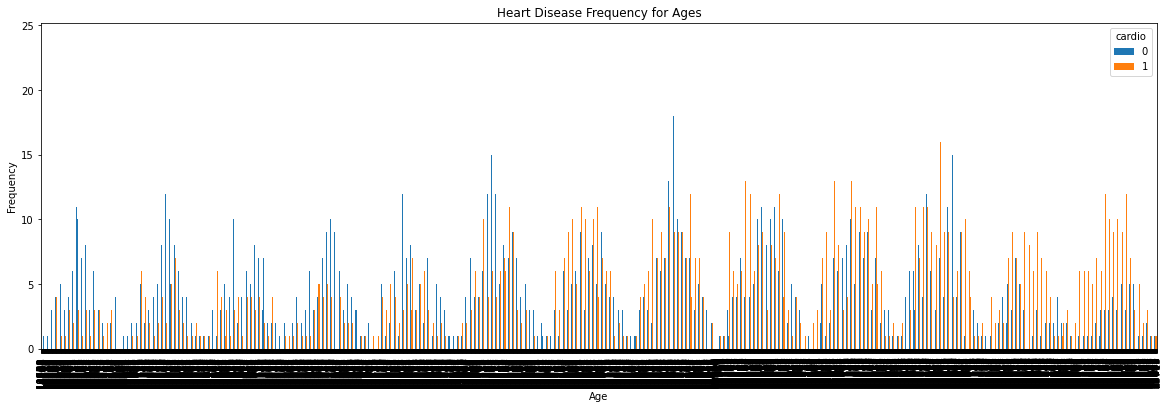

In [9]:
pd.crosstab(df.age,df.cardio).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [11]:
# Extracting input and labels and convert into numpy array to support tensorflow
y = df['cardio'].to_numpy()
x_data = df.iloc[:,:-1].to_numpy()

In [13]:
#splitting the dataset so that we could see how the model performs on real world input, also to judgw how well the model generalises
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0)

You can refer to this article [here](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7) for further clarification if you are interested.

In [16]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

optimizer = RMSprop(learning_rate=0.002) #with this method
model.compile(loss='binary_crossentropy', optimizer='adam',metrics='accuracy')


In [17]:

num_epochs = 10
#This method starts the training
history = model.fit(x_train, y_train, epochs=num_epochs, verbose=2, vali)

model.summary() #you can see the model structure we have defined above, also no of parameters in it.

Epoch 1/10
1750/1750 - 4s - loss: 0.6653 - accuracy: 0.6445
Epoch 2/10
1750/1750 - 3s - loss: 0.6192 - accuracy: 0.6725
Epoch 3/10
1750/1750 - 3s - loss: 0.6346 - accuracy: 0.6460
Epoch 4/10
1750/1750 - 3s - loss: 0.5918 - accuracy: 0.6979
Epoch 5/10
1750/1750 - 3s - loss: 0.5885 - accuracy: 0.6998
Epoch 6/10
1750/1750 - 3s - loss: 0.5841 - accuracy: 0.7040
Epoch 7/10
1750/1750 - 3s - loss: 0.5814 - accuracy: 0.7058
Epoch 8/10
1750/1750 - 3s - loss: 0.5789 - accuracy: 0.7094
Epoch 9/10
1750/1750 - 3s - loss: 0.5783 - accuracy: 0.7089
Epoch 10/10
1750/1750 - 3s - loss: 0.5774 - accuracy: 0.7089
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (32, 32)                  384       
_________________________________________________________________
batch_normalization_6 (Batch (32, 32)                  128       
_______________________________________________

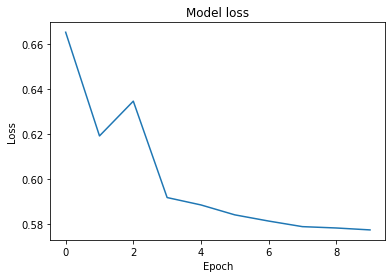

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
#We can see that loss gradually keeps on decreasing as required to

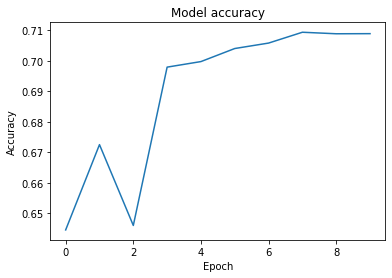

In [24]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# we can see that model accuracy increases with each epoch and almost saturates

In [ ]:
model.evaluate(x_test,y_test)
#we get an accuracy of 71% for test dataset

438/438 [==============================] - 1s 2ms/step - loss: 0.5783 - accuracy: 0.7184


[0.5783283710479736, 0.7184285521507263]